## Euro Exchange Rate Project
* The dataset describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

* If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

* Daria Chemkaeva put together the data set and made it available on Kaggle — the data source is the European Central Bank.

### Read and check data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


import matplotlib.style as style
%matplotlib inline

In [5]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [7]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [8]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

In [9]:
exchange_rates.isnull().sum()

Period\Unit:                   0
[Australian dollar ]           0
[Bulgarian lev ]             402
[Brazilian real ]            268
[Canadian dollar ]             0
[Swiss franc ]                 0
[Chinese yuan renminbi ]     268
[Cypriot pound ]            3965
[Czech koruna ]                0
[Danish krone ]                0
[Estonian kroon ]           3181
[UK pound sterling ]           0
[Greek drachma ]            5791
[Hong Kong dollar ]            0
[Croatian kuna ]             370
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[Israeli shekel ]            268
[Indian rupee ]              268
[Iceland krona ]            2407
[Japanese yen ]                0
[Korean won ]                  0
[Lithuanian litas ]         2152
[Latvian lats ]             2407
[Maltese lira ]             3965
[Mexican peso ]                0
[Malaysian ringgit ]           0
[Norwegian krone ]             0
[New Zealand dollar ]          0
[Philippine peso ]             0
[Polish zl

## Data Cleaning
* Make data format (name, datatype) consistent
* Deal with missing data
* Dealing with outliers

In [11]:
exchange_rates.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [12]:
# Change column names
exchange_rates.rename(columns={r'Period\Unit:':'Time', '[US dollar ]': 'US_dollar'}, inplace=True)

# Change time format to datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# sort value by time
exchange_rates.sort_values('Time', inplace=True)

# drop nan values
exchange_rates.reset_index(drop=True, inplace=True)

In [13]:
# Extract Us_dollar

euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6311 non-null   datetime64[ns]
 1   US_dollar  6311 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 98.7+ KB


In [21]:
# Check the target data
euro_to_dollar['US_dollar'].sort_values()

# Clean the data
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6249 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6249 non-null   datetime64[ns]
 1   US_dollar  6249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.5 KB


## Rolling Mean

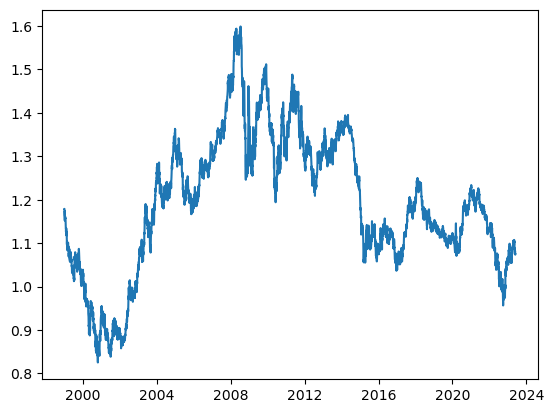

In [25]:
# Plot the original data

import matplotlib.pyplot as plt
# %matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

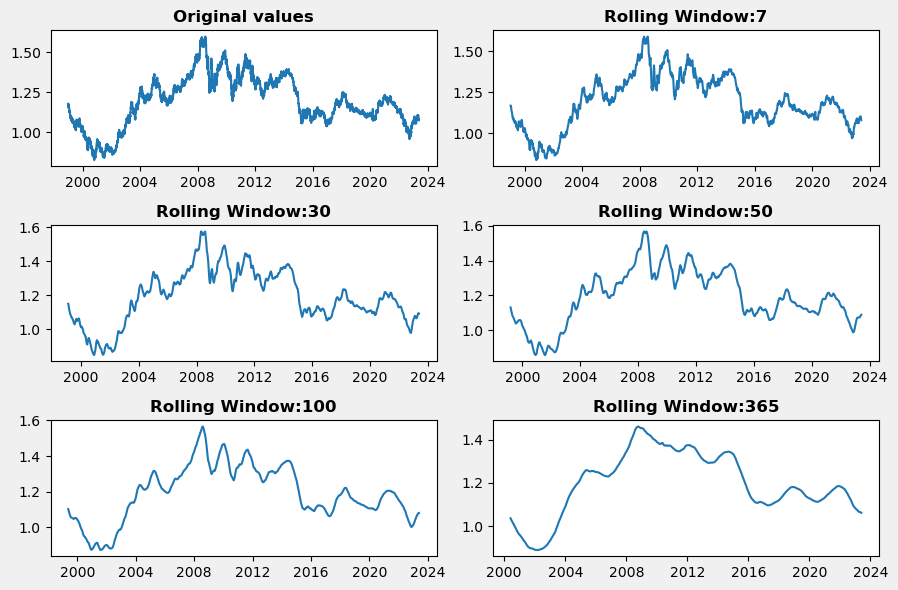

In [29]:
plt.figure(figsize=(9,6))

style.use('default')
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

## Coming up with idea
The exchange rate in different Presidency
We show comparatively how the euro-dollar rate changed under the last three US presidents:
1. (George W. Bush (2001-2009), 
2. Barack Obama (2009-2017)
3. Donald Trump (2017-2021))

## Visulization

In [35]:
# Create a new column rolling_mean

euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

### Financial Crisis

In [31]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

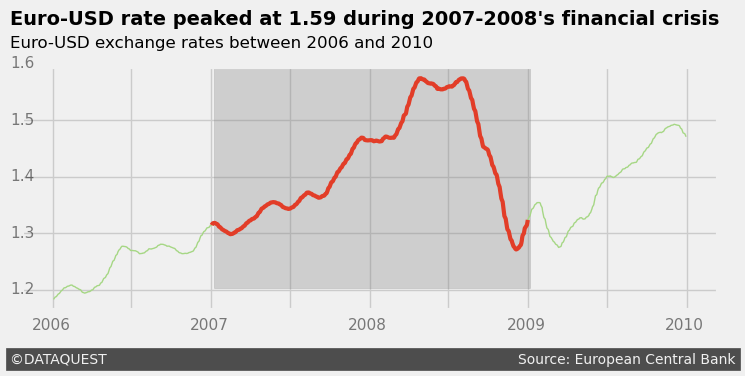

In [32]:
### Adding the FiveThirtyEight style

style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=13520.0, xmax=14250, ymin=0.09,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13100
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365
    
y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5', '1.6']:
    ax.text(13050, y, rate, alpha=0.5, fontsize=11)
    y += 0.1   

    

## Adding a title and a subtitle    
ax.text(13050, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(13050, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(13050, 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor= '#4d4d4d', size=10)

plt.show()

### Different President

The exchange rate in different Presidency
We show comparatively how the euro-dollar rate changed under the last three US presidents:
1. (George W. Bush (2001-2009), 
2. Barack Obama (2009-2017)
3. Donald Trump (2017-2021))

In [33]:
bush = euro_to_dollar[euro_to_dollar.Time.dt.year.between(2001, 2008)]
obama = euro_to_dollar[euro_to_dollar.Time.dt.year.between(2009, 2016)]
trump = euro_to_dollar[euro_to_dollar.Time.dt.year.between(2017, 2020)]

C:\Users\yuanl\AppData\Local\Temp\ipykernel_25944\4193091091.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 3, 1)
C:\Users\yuanl\AppData\Local\Temp\ipykernel_25944\4193091091.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
C:\Users\yuanl\AppData\Local\Temp\ipykernel_25944\4193091091.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
C:\Users\yuanl\AppData\Local\Temp\ipykernel_25944\4193091091.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['', '2017', '', '2018', '', '2019', '','2020', '', '2021'], alpha=0.3)


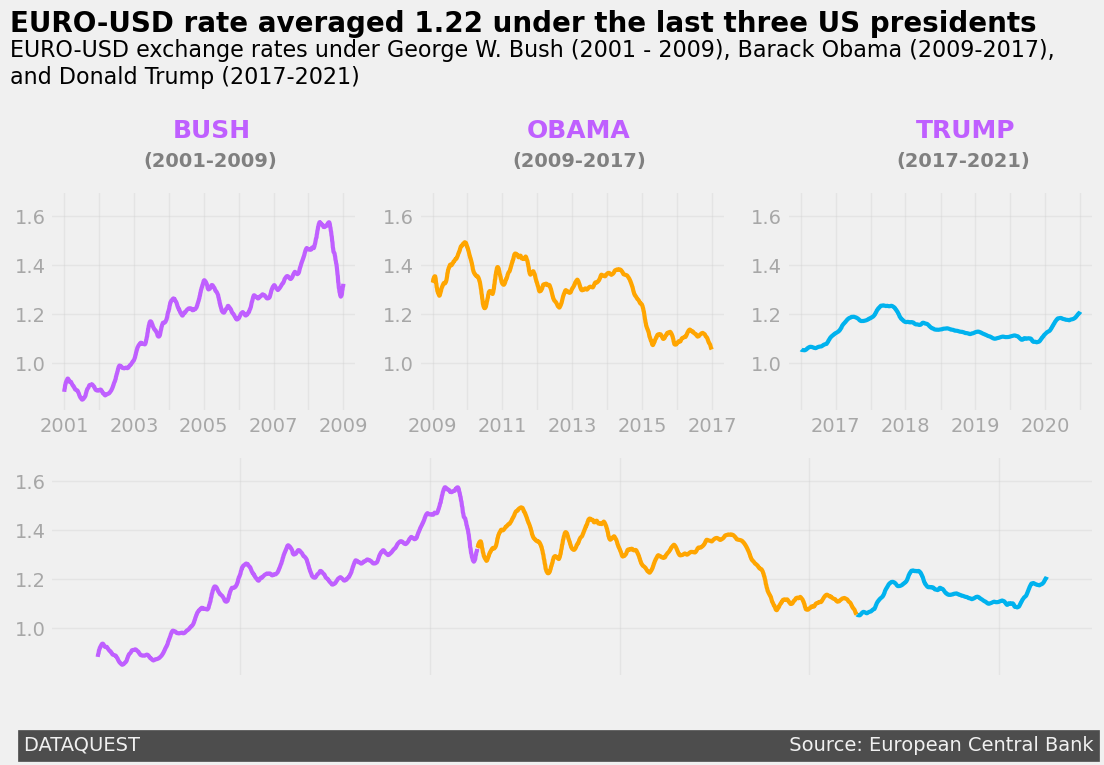

In [34]:
import datetime as dt
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,6))

ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim([0.8, 1.7])
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.3)


### Ax1 Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF', linewidth=3)
# bush_years = [str(x) for x in list((range(2001, 2010, 2)))]
# y1_labels = [str(float(x/10)) for x in list((range(10, 17, 2)))]
# x1 = ax1.get_xticks()[0]+150
# y1 = 1.0
# ax1.set_xticklabels([])
# ax1.set_yticklabels([])

# for year in bush_years:
#     ax1.text(x1, 0.75, year, size=12, alpha=0.5)
#     x1 += 365*2
        
# for y in y1_labels:  
#     x1 = ax1.get_xticks()[0]-100
#     ax1.text(x1, y1-0.02, y, size=12, alpha=0.5) 
#     y1 += 0.2

ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'], alpha=0.3)

ax1.text(ax1.get_xticks()[0]+1500, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(ax1.get_xticks()[0]+1200, 1.8, '(2001-2009)',weight='bold', c='grey')


### Ax2 Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#ffa500', linewidth=3)
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'], alpha=0.3)

ax2.text(ax2.get_xticks()[0]+1350, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#BF5FFF')
ax2.text(ax2.get_xticks()[0]+1200, 1.8, '(2009-2017)',weight='bold', c='grey')



### Ax3 Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE', linewidth=3)
ax3.set_xticklabels(['', '2017', '', '2018', '', '2019', '','2020', '', '2021'], alpha=0.3)

ax3.text(ax3.get_xticks()[0]+600, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#BF5FFF')
ax3.text(ax3.get_xticks()[0]+500, 1.8, '(2017-2021)',weight='bold', c='grey')

### AX4 BUSH-OBAMA-TRUMP
ax4.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF', linewidth=3)
ax4.plot(obama['Time'], obama['rolling_mean'], color='#ffa500', linewidth=3)
ax4.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE', linewidth=3)
ax4.set_xticklabels([])
ax4.grid(alpha=0.3)

### Adding a title and a subtitle
ax1.text(ax1.get_xticks()[0]-200, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(ax1.get_xticks()[0]-200, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)


### Adding a signature

ax4.text(ax1.get_xticks()[0]-200, 0.5, 'DATAQUEST' + ' '*106 + 'Source: European Central Bank', 
         color='#f0f0f0', backgroundcolor='#4d4d4d')



plt.show()